In [50]:
# (auto-reload changes from imported libraries)
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
%reload_ext autoreload

In [52]:
# dfg_path = "/Users/wvw/git/pm/compare_logs/tc pilot medical/data/Event Dictionaries/PMed_Reallocation_New2_Event Dictionary.py"
dfg_path = "/Users/wvw/git/pm/pqn/inf/data/tc/2/disc.py"
dfg_disc = eval(open(dfg_path, "r").read())

In [53]:
# dfg_path = "/Users/wvw/git/pm/compare_logs/tc pilot medical/data/tc_medical_cert-normative-align.py"
dfg_path = "/Users/wvw/git/pm/pqn/inf/data/tc/2/norm.py"
dfg_norm = eval(open(dfg_path, "r").read())

In [54]:
from convert_dfg import convert_dfg_rdf, DFGSource
from rdflib import Namespace

TC = Namespace("http://canada.org/tc#")

convert_dfg_rdf(dfg_norm, "../inf/data/tc/2/norm.n3", TC, DFGSource.NORMATIVE)
convert_dfg_rdf(dfg_disc, "../inf/data/tc/2/disc.n3", TC, DFGSource.DISCOVERED)

conversion time (ms): 0.623
save time (ms): 1.634
total time (ms): 2.321
conversion time (ms): 0.104
save time (ms): 0.431
total time (ms): 0.544


conversion time (ms): 0.968
{('c', 'd'): 1}


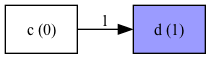

In [84]:

from pm4py.visualization.dfg import visualizer as dfg_visualizer
from convert_dfg import convert_rdf_dfg

# dfg = convert_rdf_dfg("../infer/data/tests/consistLnk/consistLnkA.n3", "")
# dfg = convert_rdf_dfg("../infer/data/tests/princ3.n3", "")
dfg = convert_rdf_dfg("../infer/data/out/princ4.n3", "")
print(dfg)
dfg_visualizer.view(dfg_visualizer.apply(dfg))